# Лабораторна робота №1

## Дослідження та візуалізація даних за допомогою Python

## Мета: отримання базових навичок використання Python для дослідження та візуалізації даних

# ВАРІАНТ 3

### Завдання 1
### Створити функцію, яка приймає назву файлу та назву стовпця як параметр та повертає масив numpy зі значеннями стовпця

#### Функція векторизації даних

In [ ]:
import numpy as np

def vectorizeForNumpy(fileName, columnName):
    with open(fileName, mode='r') as file:
        csvFile = csv.DictReader(file) 
        
        vector = np.array([int(row[columnName]) for row in csvFile if row[columnName]])

    return vector

### Завдання 2
### Використовуючи функцію з попереднього завдання, створити масив numpy зі значень стовпця «APC» (Armored personnel carrier).

#### APC колона з CSV файлу

In [13]:
vector = vectorizeForNumpy('russia_losses_equipment.csv', 'APC')
print(vector)

[17222 17170 17132 17093 17080 17077 17071 17063 17043 17003 16955 16938
 16925 16906 16897 16878 16878 16869 16848 16821 16786 16760 16736 16722
 16699 16681 16667 16648 16631 16620 16599 16567 16542 16521 16495 16480
 16473 16461 16426 16402 16385 16368 16363 16350 16341 16332 16323 16294
 16286 16255 16238 16211 16203 16161 16141 16103 16095 16074 16050 16039
 16013 16000 15980 15963 15917 15902 15883 15871 15862 15826 15811 15779
 15755 15732 15715 15704 15685 15645 15629 15611 15600 15583 15566 15550
 15524 15505 15480 15459 15450 15431 15413 15398 15383 15372 15337 15319
 15307 15287 15269 15263 15234 15208 15187 15176 15144 15131 15105 15096
 15076 15036 15020 15002 14980 14947 14935 14913 14891 14858 14818 14803
 14786 14775 14748 14721 14699 14665 14630 14595 14552 14538 14508 14460
 14417 14375 14353 14313 14281 14246 14227 14213 14179 14156 14129 14096
 14067 14046 14007 13991 13971 13957 13942 13928 13916 13904 13896 13873
 13852 13835 13827 13809 13796 13765 13745 13698 13

### Завдання 3
### Знайти добові втрати БТР

#### Добові втрати російської армії

In [6]:
def calculate_daily_losses(apc_vector):
    daily_losses = apc_vector[1:] - apc_vector[:-1]
    daily_losses = abs(daily_losses)

    return daily_losses

vector = vectorizeForNumpy('russia_losses_equipment.csv', 'APC')
dailyLosses = calculate_daily_losses(vector)
print('Daily russian APC losses are: ', dailyLosses);
print('Glory to Ukraine')

Daily russian APC losses are:  [ 52  38  39  13   3   6   8  20  40  48  17  13  19   9  19   0   9  21
  27  35  26  24  14  23  18  14  19  17  11  21  32  25  21  26  15   7
  12  35  24  17  17   5  13   9   9   9  29   8  31  17  27   8  42  20
  38   8  21  24  11  26  13  20  17  46  15  19  12   9  36  15  32  24
  23  17  11  19  40  16  18  11  17  17  16  26  19  25  21   9  19  18
  15  15  11  35  18  12  20  18   6  29  26  21  11  32  13  26   9  20
  40  16  18  22  33  12  22  22  33  40  15  17  11  27  27  22  34  35
  35  43  14  30  48  43  42  22  40  32  35  19  14  34  23  27  33  29
  21  39  16  20  14  15  14  12  12   8  23  21  17   8  18  13  31  20
  47  19  12  47  45  24  54  38  73  18  18  29  17  20  20  27  21   9
  24  25  28  19  37  16   9  35  17  24  24  11  17  20  27  24  27  25
  19  51  40  28  21  28  29  30  44  14  16  37  16  15  37  35  70  36
  34  53  16  39  47  39  27  21  14  21  22  20  22  35   4  13  13  19
  16  32  29  25  19

### Завдання 4
### Знайти 5 найбільших добових втрат БТР

#### Вектор найбільших добових втрат

In [7]:
top_5_losses = np.sort(dailyLosses)[-5:][::-1]
print(f"Top 5 Daily APC Losses: {top_5_losses}")

Top 5 Daily APC Losses: [190 120 110  96  91]


### Завдання 5
### Визначити, скільки БТР було знищено влітку 2023 року

#### Втрати бронетехніки за літо 2023 року

In [8]:
from datetime import datetime
# Function to read and filter data using only the CSV library
def vectorizeWithDate(fileName, columnName, start_date=None, end_date=None):
    vector = []
    
    # Open the CSV file
    with open(fileName, mode='r') as file:
        csvFile = csv.DictReader(file)
        
        # Loop through each row and filter by date range
        for row in csvFile:
            date = datetime.strptime(row['date'], '%Y-%m-%d')  # Adjust the date format if needed
            
            # Check if the row falls within the specified date range
            if start_date and end_date:
                if start_date <= date <= end_date:
                    # Append the value of the specified column to the vector
                    vector.append(int(row[columnName]))

    return np.array(vector)
    

# Define the summer period (June 1, 2023 - August 31, 2023)
start_date = datetime.strptime('2023-06-01', '%Y-%m-%d')
end_date = datetime.strptime('2023-08-31', '%Y-%m-%d')
fileName = 'russia_losses_equipment.csv'
columnName = 'APC'

# Step 1: Vectorize data for the summer period using vectorizeForNumpy
summer_apc_vector = vectorizeWithDate(fileName, columnName, start_date, end_date)

# Step 2: Calculate daily losses for the summer period
summer_daily_losses = calculate_daily_losses(summer_apc_vector)

print('russian summer APC daily losses are:', summer_daily_losses)

russian summer APC daily losses are: [ 8 17 17  8 15 18 10 23 12 27 14 11 14 12 18 10 16 19 11  6 15 13 12  8
  8 11  2 15 21  8 17 10 11  6 14 11  5 13 13  9 16 15  6  8 17  8  7 11
  9  9  7 17  2 11  9 12 15  9  9 11 20  5  6 10 13 14 14  2  6 15 12 21
 15  6 23 23 16 14 11  6  5 24  7 24 16 17 20 11 10 12 12]


### Завдання 6
### Знайти середнє значення знищених БТР за 100-500 днів війни

#### Середні втрати за 100-500 днів війни

In [9]:
# Function to vectorize APC losses between specific days of the war
def vectorizeForNumpy_by_day(fileName, columnName, start_day, end_day):
    vector = []
    
    # Open the CSV file
    with open(fileName, mode='r') as file:
        csvFile = csv.DictReader(file)
        
        # Loop through each row and filter by the war day range
        for row in csvFile:
            day = int(row['day'])  # Convert the 'day' column to an integer
            
            # Check if the row falls within the specified day range
            if start_day <= day <= end_day:
                vector.append(int(row[columnName]))  # Append the APC values

    return np.array(vector)

# Function to calculate average daily losses
def calculate_average_losses(apc_vector):
    # Calculate the daily differences between consecutive values
    daily_losses = np.diff(apc_vector)

    daily_losses = np.abs(daily_losses)
    
    # Calculate the average daily loss
    average_loss = np.mean(daily_losses)
    
    return average_loss

# Define the range of days (100 to 500)
start_day = 100
end_day = 500
fileName = 'russia_losses_equipment.csv'
columnName = 'APC'

# Step 1: Vectorize data for the day range using vectorizeForNumpy_by_day
apc_vector = vectorizeForNumpy_by_day(fileName, columnName, start_day, end_day)

# Step 2: Calculate average daily losses for the specified period
average_daily_loss = calculate_average_losses(apc_vector)

# Output the result
print(f"Average Daily APC Losses between day 100 and 500: {average_daily_loss:.2f}")

Average Daily APC Losses between day 100 and 500: 11.54


### Завдання 7
### Створіть графік втрат БТР за останні 200 днів (починаючи з останньої дати в наборі даних)

#### Графік втрат броньованої техніки ворогом за останні 200 днів війни

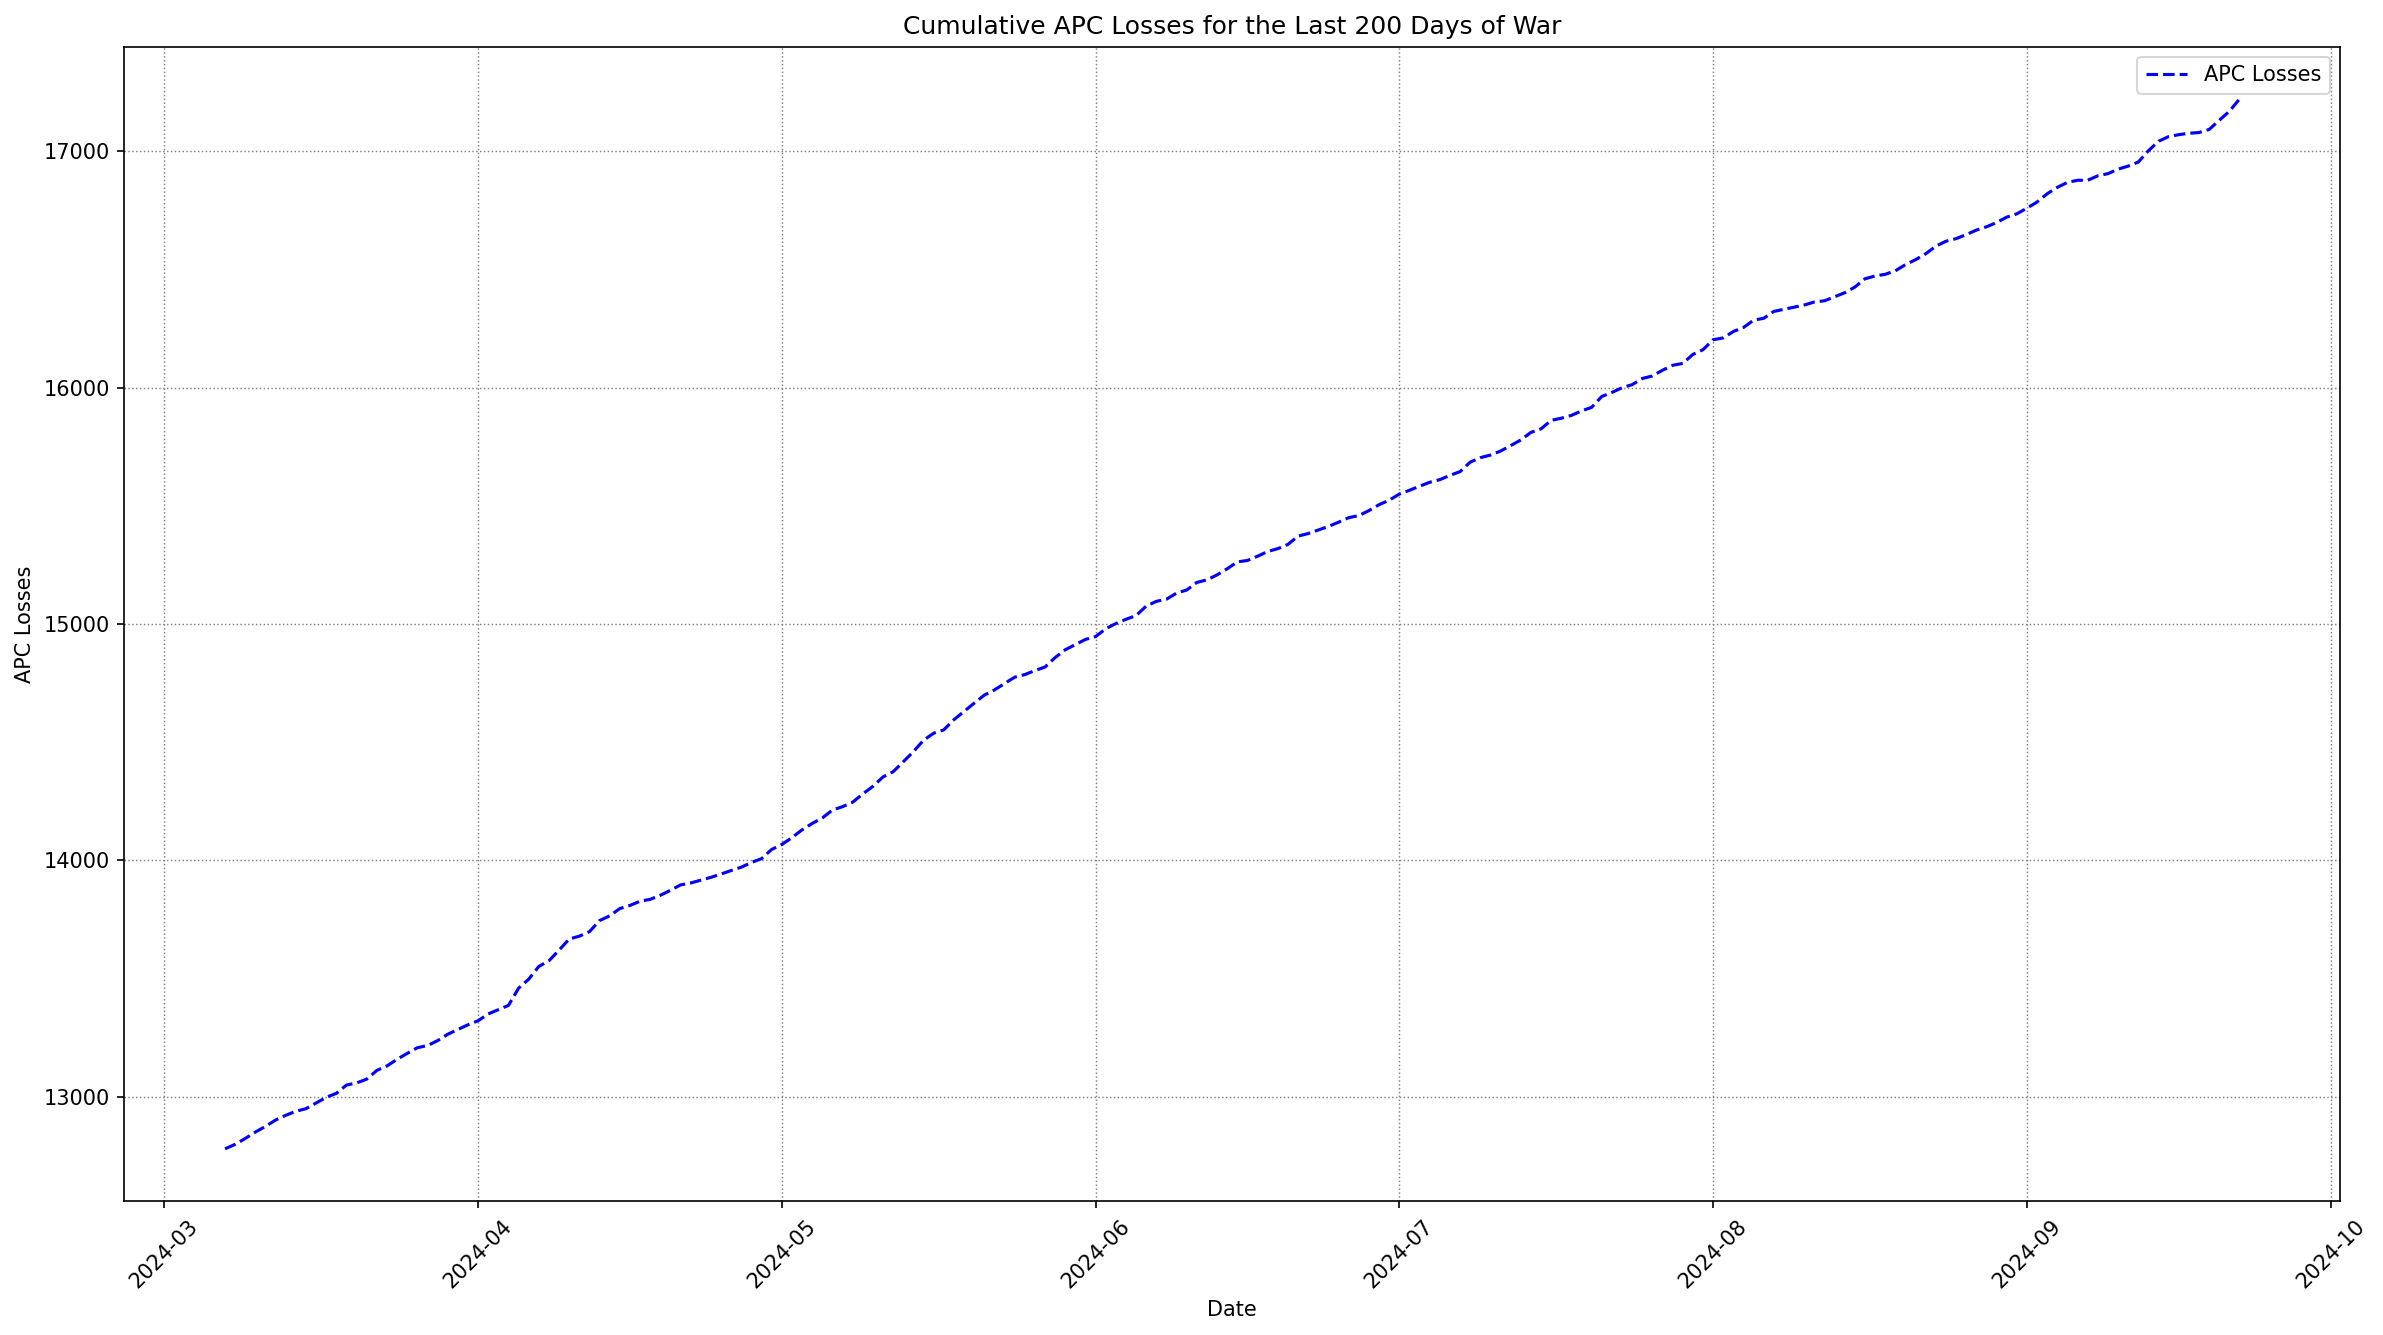

In [21]:
import matplotlib.pyplot as plt

# Function to vectorize data for the last N days
def vectorizeForNumpy_last_n_days(fileName, columnName, last_n_days):
    dates = []
    vector = []
    
    # Open the CSV file
    with open(fileName, mode='r') as file:
        csvFile = csv.DictReader(file)
        
        # Loop through each row and append date and APC values
        for row in csvFile:
            date = datetime.strptime(row['date'], '%Y-%m-%d')
            dates.append(date)
            vector.append(int(row[columnName]))
    
    # Convert to NumPy arrays
    dates = np.array(dates)
    vector = np.array(vector)
    
    # Sort dates and values in case they are not in the correct order
    sorted_indices = np.argsort(dates)
    dates = dates[sorted_indices]
    vector = vector[sorted_indices]
    
    # Return the last N days
    return dates[-last_n_days:], vector[-last_n_days:]

# Define the last N days
last_n_days = 200
fileName = 'russia_losses_equipment.csv'
columnName = 'APC'

# Step 1: Get data for the last N days
dates, apc_vector = vectorizeForNumpy_last_n_days(fileName, columnName, last_n_days)

# Step 2: Plot the APC losses for the last N days
plt.figure(figsize=(16, 9), dpi=150)  # Set the figure size to 16x9 inches and 100 DPI
plt.plot(dates, apc_vector, linestyle='--', color='b', label='APC Losses')  # Dashed line

# Customize the plot
plt.title('Cumulative APC Losses for the Last 200 Days of War')  # Add title
plt.xlabel('Date')  # Label for x-axis
plt.ylabel('APC Losses')  # Label for y-axis
plt.grid(True, color='gray', linestyle=':', linewidth=0.7)  # Add grid with specific style and color

# Add legend
plt.legend()

# Rotate date labels for better readability
plt.xticks(rotation=45)

# Save the plot as a PNG file
plt.tight_layout()
plt.savefig('apc_losses_plot.png', format='png')

# Show the plot
plt.show()